In [17]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [18]:
# GLOBAL VARIABLES
path = "NITROHCS_V1.0"
Test_Ratio = 0.2
ValRatio = 0.2
images = []
classid = []
inputShape = (32,32,3)
batchsizeVal = 64
# stepsPerEpochsVal = 200
epochsVal = 10
# img = cv2.imread(path+"/0/IMG_20210613_164138.jpg")
# img.shape

In [19]:
# to know number and name of the letters in our dataset
#listdir - list of directories
# myList = os.listdir(path)
# noofclasses = len(myList)
# print("No of Classes Detected = ",noofclasses)

# print("Importing Classes...")

# for x in range(0,noofclasses):
#     picList = os.listdir(path+"/"+myList[x])
#     for y in picList:
#         curImg = cv2.imread(path+"/"+myList[x]+"/"+y)
#         curImg = cv2.resize(curImg,(inputShape[0],inputShape[1]))
#         images.append(curImg)
#         classid.append(x)
#     print(x,end=" ")
# print(" ")    
# print("No of images imported = ",len(images)) 

# # To convert into numpy array
# images = np.array(images)
# classid = np.array(classid)

# print(images.shape)
# print(classid.shape)


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(inputShape[0],inputShape[1]),
  batch_size=batchsizeVal)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(inputShape[0],inputShape[1]),
  batch_size=batchsizeVal)

class_names = train_ds.class_names
print(class_names)

Found 15040 files belonging to 47 classes.
Using 12032 files for training.
Found 15040 files belonging to 47 classes.
Using 3008 files for validation.
['NITROHCS-001', 'NITROHCS-002', 'NITROHCS-003', 'NITROHCS-004', 'NITROHCS-005', 'NITROHCS-006', 'NITROHCS-007', 'NITROHCS-008', 'NITROHCS-009', 'NITROHCS-010', 'NITROHCS-011', 'NITROHCS-012', 'NITROHCS-013', 'NITROHCS-014', 'NITROHCS-015', 'NITROHCS-016', 'NITROHCS-017', 'NITROHCS-018', 'NITROHCS-019', 'NITROHCS-020', 'NITROHCS-021', 'NITROHCS-022', 'NITROHCS-023', 'NITROHCS-024', 'NITROHCS-025', 'NITROHCS-026', 'NITROHCS-027', 'NITROHCS-028', 'NITROHCS-029', 'NITROHCS-030', 'NITROHCS-031', 'NITROHCS-032', 'NITROHCS-033', 'NITROHCS-034', 'NITROHCS-035', 'NITROHCS-036', 'NITROHCS-037', 'NITROHCS-038', 'NITROHCS-039', 'NITROHCS-040', 'NITROHCS-041', 'NITROHCS-042', 'NITROHCS-043', 'NITROHCS-044', 'NITROHCS-045', 'NITROHCS-046', 'NITROHCS-047']


In [20]:
# X_train,X_test,y_train,y_test = train_test_split(images,classid,test_size=Test_Ratio)
# X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=ValRatio)
# print(X_test.shape)
# print(X_train.shape)
# print(X_validation.shape)

# noOfSamples = []
# print(len(np.where(y_train==0)[0]))
# for x in range (0,len(class_names)):
#     noOfSamples.append(len(np.where(y_train==x)[0]))
# print(noOfSamples)    

# plt.figure(figsize=(10,5))
# plt.bar(range(0,len(class_names)),noOfSamples)
# plt.title("Number of images per class")
# plt.xlabel("Class ID")
# plt.ylabel("Number of images")
# plt.show()

### Training the model



In [21]:

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=inputShape,
    pooling=max,
    classes=len(class_names),
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(len(class_names), activation='softmax'))

In [22]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 module_wrapper_6 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_7 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_8 (ModuleWra  (None, 47)               24111     
 pper)                                                           
                                                                 
Total params: 24,637,999
Trainable params: 1,073,199
Non-trainable params: 23,564,800
__________________________________

In [23]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
print(train_ds.__len__)
print(val_ds.__len__)
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochsVal
)

<bound method DatasetV2.__len__ of <BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>
<bound method DatasetV2.__len__ of <BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>
Epoch 1/10
188/188 [==============================] - 46s 228ms/step - loss: 63.9588 - accuracy: 0.0957 - val_loss: 4.5002 - val_accuracy: 0.0838
Epoch 2/10
188/188 [==============================] - 35s 184ms/step - loss: 3.7381 - accuracy: 0.0599 - val_loss: 3.7177 - val_accuracy: 0.0578
Epoch 3/10
188/188 [==============================] - 34s 182ms/step - loss: 3.6753 - accuracy: 0.0718 - val_loss: 3.6784 - val_accuracy: 0.0698
Epoch 4/10
188/188 [==============================] - 34s 182ms/step - loss: 3.6611 - accuracy: 0.0734 - val_loss: 3.7071 - val_accuracy: 0.0622
Epoch 5/10
188/188 [=============================

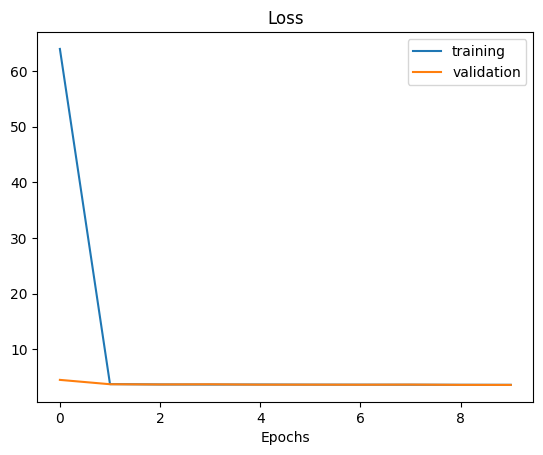

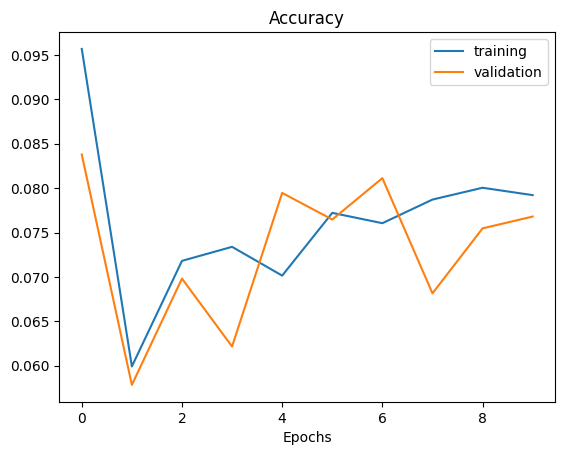

Test score =  3.5937538146972656
Test Accuracy =  0.07679521292448044


In [25]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('Epochs')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

plt.show()
score = resnet_model.evaluate(val_ds,verbose=0)
print("Test score = ",score[0])
print("Test Accuracy = ",score[1])